

# Project: Investigate a Dataset (Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 I used movies data for analysis, this data contain some information about movies untill 2015, these information include the name of the movies, the year of release, the genres of the movie, the cast of movie the budget the revenue and more and more information. I wondered some questions regarding the data such as: what is the film that has the most Budget and Revenue and profit and what is the film that has the least Budget and revenue and Profit? what is the year that movies have the most no.of profitable? Who is the most popular cast?


In [104]:
# the packages which will be used.
import seaborn as sb
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling
 In this section the data were loading and cleaned to be ready for analysis. 


In [105]:
# Loading data and printing out a few lines from it. 
data = pd.read_csv('tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



## My obsevation from the dataset
I consedered that the unit which is mentioned in the dataset is dollar because it is the most international currency used.

### Data Cleaning 

#### Important observation regarding this process

I removed some columns such as id, imdb_id, vote_count, production_company, keywords, homepage etc. because they will not be used.

The duplicacy in the rows was removed.

The zeros values were discarded such as some budgets and revenues for some movies, may be it has not been recorded.

I Changed the release date column into date format.

Changing format of budget and revenue column into integer.

##### First: Removing Unused columns


Columns to delete are: id, imdb_id, homepage, keywords, overview, production_companies and vote_count

In [106]:
# After reviewing the dataset data and decided what is need to be
#   cleaned, these cleaning steps were performed.

del_col=[ 'id', 'imdb_id', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count']

#deleting the columns
data = data.drop(del_col,1)

#previewing the new dataset
data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


##### Second: Removing the duplicacy in the rows.


In [107]:
data.drop_duplicates(keep ='first', inplace=True)
rows, col = data.shape

print('Now there are {} entries of movies without dublicate and {} no.of columns.'.format(rows-1, col))

Now there are 10864 entries of movies without dublicate and 14 no.of columns.


##### Third: Removing zero's from budget and the revenue columns

In [108]:
# creating a seperate list of revenue and budget column
temp_col=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
data[temp_col] = data[temp_col].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
data.dropna(subset = temp_col, inplace = True)

rows, col = data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


##### Fourth: Changing the release date column into standard date format

In [109]:
data.release_date = pd.to_datetime(data['release_date'])
data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09


##### Fifth: Changing the type of budget and revenue column
change budget and revenue column into integer

In [110]:
temp_col=['budget', 'revenue','budget_adj', 'revenue_adj']
data[temp_col]=data[temp_col].applymap(np.int64)

<a id='eda'></a>
## Exploratory Data Analysis

Now the data are clean, some statistics will be computed some visualizations will be created with the goal of addressing the research questions that i posed in the Introduction section. 

### Research Question 1 (What is the film that has the most Budget and Revenue and what is the film that has the least Budget and Profit?) 
#### Calculating the profit of the each movie

In [111]:
data.insert(2,'profit',data['revenue']-data['budget'])
data.insert(13,'profit_adj',data['revenue_adj']-data['budget_adj'])

data.head()

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,profit_adj,budget_adj,revenue_adj
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1254445953,137999939,1392445892
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,210161353,137999939,348161292
2,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,170419070,101199955,271619025
3,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1718723210,183999919,1902723129
4,9.335014,190000000,1316249360,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,7.3,2015,1210948878,174799923,1385748801


In [112]:

import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= data[column].idxmax()
    high_details=pd.DataFrame(data.loc[high])
    
    #for lowest earned profit
    low= data[column].idxmin()
    low_details=pd.DataFrame(data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('budget')

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
profit,-413912431,99
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


In [113]:
calculate('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
profit,2544505847,-5999998
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


In [114]:
calculate('profit')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
profit,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


### Research Question 2  (what is the year we that movies have the most no.of profitable?)

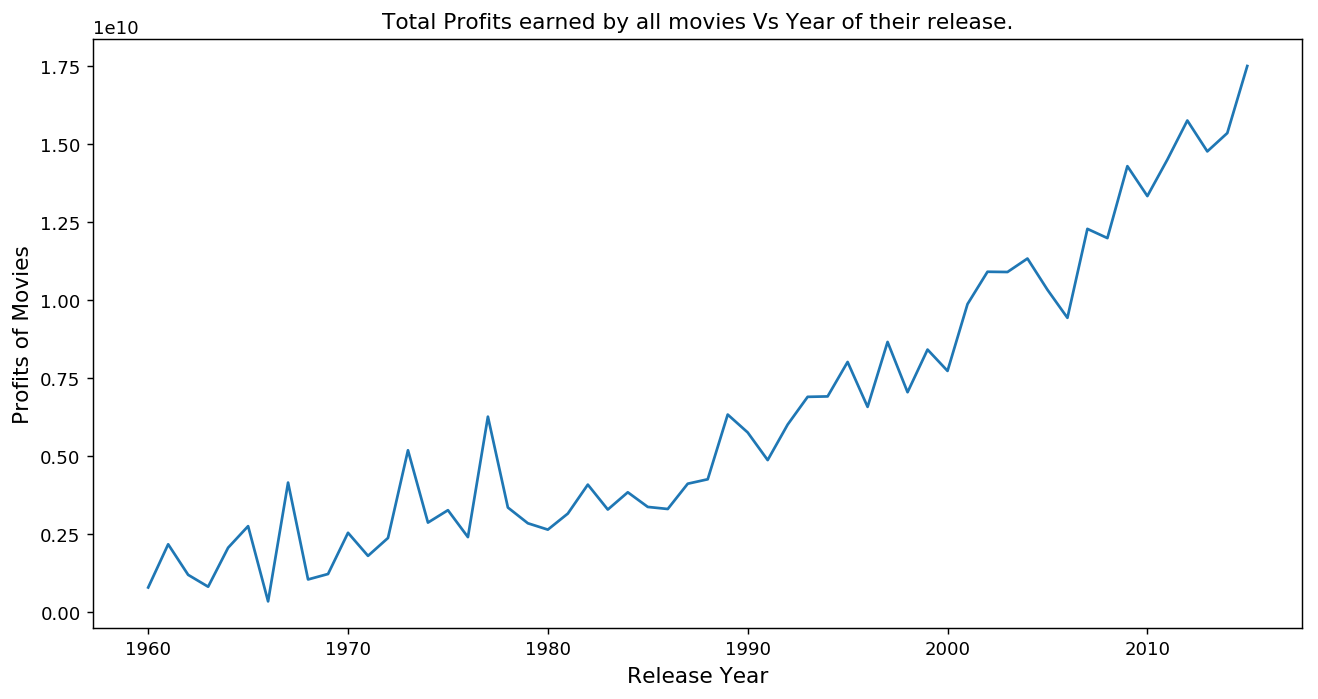

In [115]:

# Line plot will be used for this analysis

profits_year = data.groupby('release_year')['profit_adj'].sum()
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year', fontsize = 12)
#on y-axis
plt.ylabel('Profits of Movies', fontsize = 12)
#title of the line plot
plt.title('Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [116]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 30)
y = 

plt.plot(x, y, 'o', color='black')

SyntaxError: invalid syntax (<ipython-input-116-5e919a399efe>, line 3)

### Research Question 3  ( Who is the most popular cast?)

In [117]:
def result(column):
    #will take a column, and separate the string by '|'
    result = data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    result = pd.Series(result.split('|'))
    
    #arranging in descending order
    count = result.value_counts(ascending = False)
    
    return count

In [118]:
#variable to store the retured value
count = result('cast')
#printing top 5 values
count.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

As noted Robert De Niro is on the top with total 52 cast followed by Bruce Willis with 46 and Samuel L. Jackson with 44 and Nicolas Cage with 43 and Matt Damon 36.

### Research Question 4 ( What is the runtime of films?)

In [119]:
def avg_fun(column):
    return data[column].mean()
avg_fun('runtime')

109.22029060716139

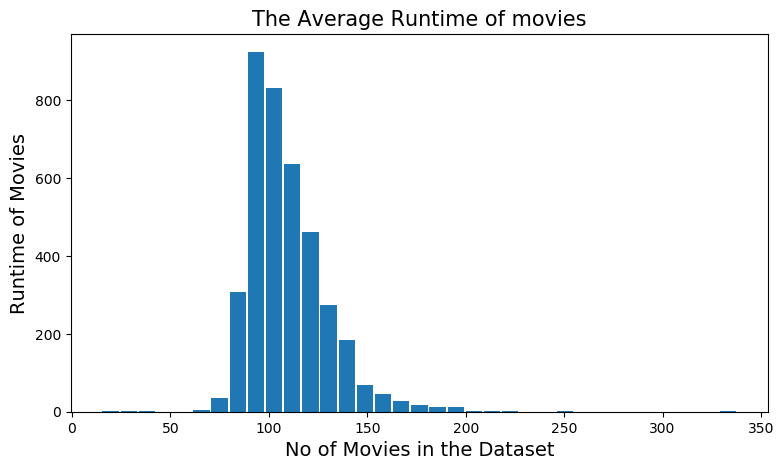

In [120]:
plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('No of Movies in the Dataset', fontsize=14)
plt.ylabel('Runtime of Movies', fontsize = 14)
plt.title('The Average Runtime of movies', fontsize=15)
plt.hist( data['runtime'], rwidth = 0.9, bins =35)
plt.show()

### Research Question 5 (How does the relationship between runtime and vote average go?)


Text(0,0.5,'Rating')

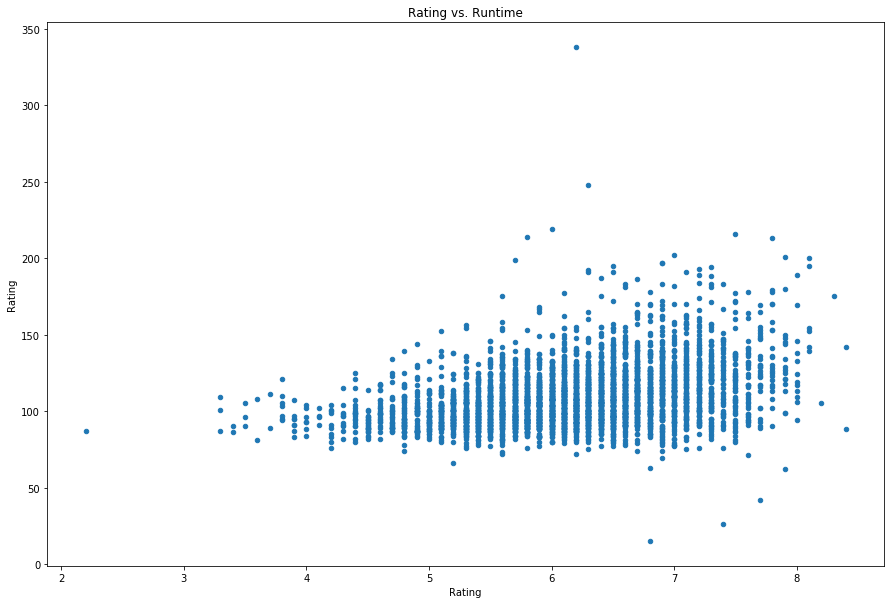

In [121]:
data.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Rating vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Rating')

### Research Question 6  (In which month the movies were released the highest number overall years?)

Text(0,0.5,'Number of movie releases')

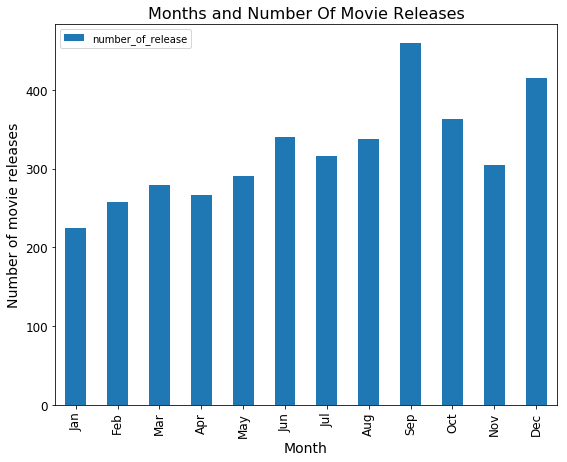

In [122]:
month_release = data['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 12,figsize=(9,7))

#set the labels and titles of the plot.
plt.title('Months and Number Of Movie Releases',fontsize = 16)
plt.xlabel('Month',fontsize = 14)
plt.ylabel('Number of movie releases',fontsize = 14)


###  Research Question 7 (  How does the profit and the popularity of films differs each other?

Text(0,0.5,'profit')

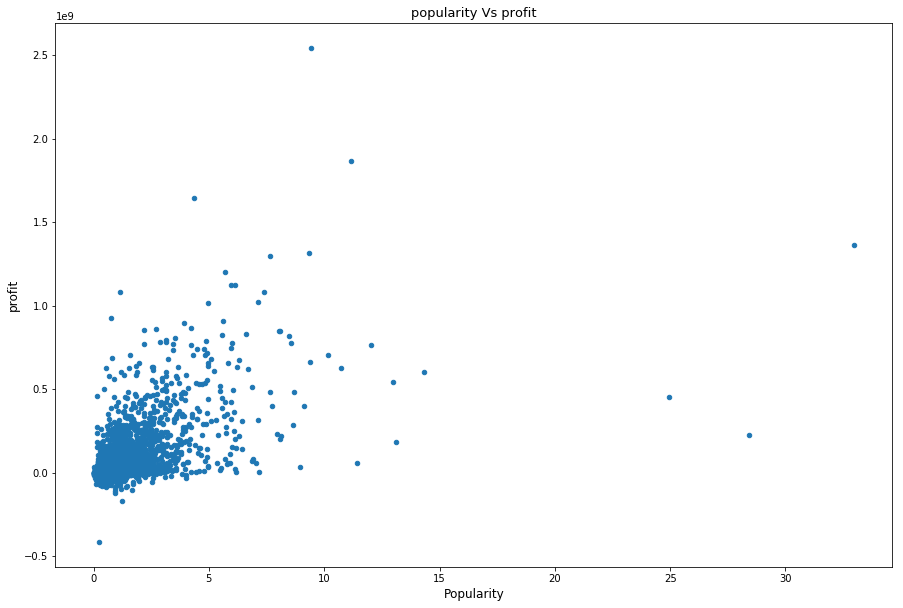

In [126]:
data.plot(x='popularity', y='profit', kind='scatter', figsize=(15,10))
plt.title('popularity Vs profit' ,fontsize=13)
plt.xlabel('Popularity' ,fontsize=12)
plt.ylabel('profit' ,fontsize=12)



<a id='conclusions'></a>
## Conclusions
 After the analysis of the data, there are some of valuable information and facts about movies such as:
 1- It is not necessary for the film budget to be high enough to generate high revenues.
 2- Avatar movie has the highest revenue and profit.
 3- The evolution of movies production is increasing over years.
 4- the top five cast were Robert De Niro,Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon.
 5- If the film is short, it's have a mid-to-high rating.
 6- June and December have the highest revenue for movie releases.
 
 ## Limitations
 1- About  data cleaning: in the runtime, budget_adj and revenue_adj I filled all of the 0 values with their means. This possibly could have been more accurate if I used regression to find like-properties to fill the 0 values instead of the mean.
 2- I am not sure if the data provided is completel corect and up-to-date. becuase the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in.



